In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Results - Reaction search example

> An example of a reaction search in the Schneider 50k data set

In [ ]:
# hide
import json
import numpy as np
import pandas as pd
import tmap as tm
from tqdm import tqdm

from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# use IPythonConsole for pretty drawings
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display

## Load data

In [ ]:
# data
lf = tm.LSHForest(256, 128)
mh_encoder = tm.Minhash()

with open('../data/rxnclass2name.json', 'r') as f:
    rxnclass2name = json.load(f)

schneider_df = pd.read_csv('../data/schneider50k.tsv', sep='\t', index_col=0)
ft_10k_fps = np.load('../data/fps_ft.npz')['fps']
schneider_df['mhfp'] =  [mh_encoder.from_weight_array(fp.tolist(), method="I2CWS") for fp in tqdm(ft_10k_fps)]

100%|██████████| 50000/50000 [00:15<00:00, 3194.60it/s]


## Initiate LSHForest with training set fingerprints 

In [ ]:
# data
train_df = schneider_df[schneider_df.split=='train']
train_df.reset_index(inplace=True)
lf.batch_add(train_df.mhfp.values.tolist())
lf.index()

## Query for similar reactions 

------------------------------------------------------------------------------------------------
Query: Reaction class - 5.1.1 N-Boc protection


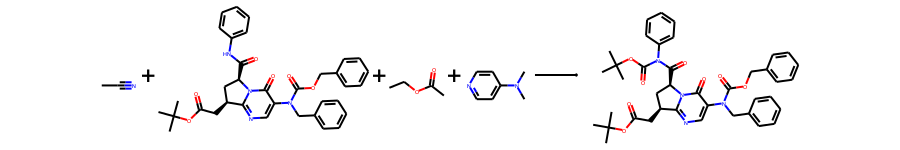

CC#N.CC(C)(C)OC(=O)C[C@H]1C[C@@H](C(=O)Nc2ccccc2)n2c1ncc(N(Cc1ccccc1)C(=O)OCc1ccccc1)c2=O.CCOC(C)=O.CN(C)c1ccncc1>>CC(C)(C)OC(=O)C[C@H]1C[C@@H](C(=O)N(C(=O)OC(C)(C)C)c2ccccc2)n2c1ncc(N(Cc1ccccc1)C(=O)OCc1ccccc1)c2=O
------------------------------------------------------------------------------------------------



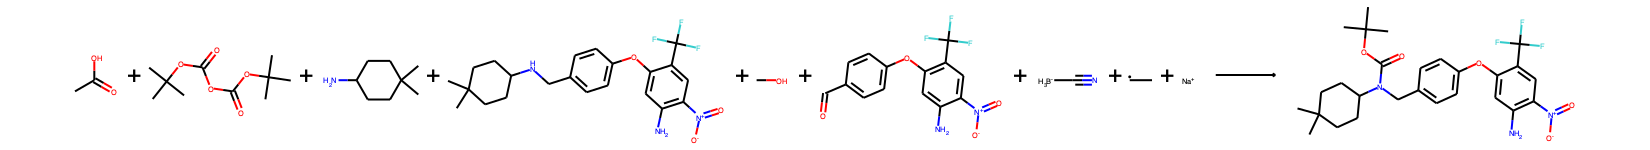

CC(=O)O.CC(C)(C)OC(=O)OC(=O)OC(C)(C)C.CC1(C)CCC(N)CC1.CC1(C)CCC(NCc2ccc(Oc3cc(N)c([N+](=O)[O-])cc3C(F)(F)F)cc2)CC1.CO.Nc1cc(Oc2ccc(C=O)cc2)c(C(F)(F)F)cc1[N+](=O)[O-].[BH3-]C#N.[CH2]C.[Na+]>>CC1(C)CCC(N(Cc2ccc(Oc3cc(N)c([N+](=O)[O-])cc3C(F)(F)F)cc2)C(=O)OC(C)(C)C)CC1
NN-1 - 5.1.1 N-Boc protection


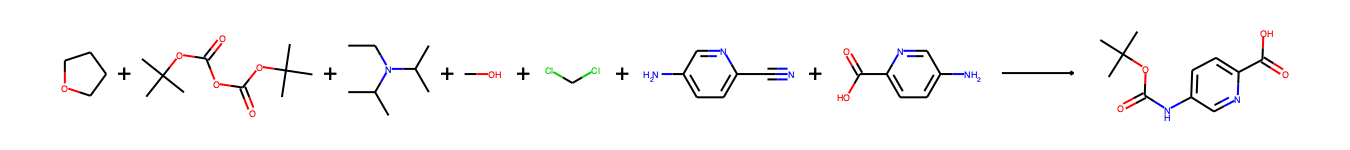

C1CCOC1.CC(C)(C)OC(=O)OC(=O)OC(C)(C)C.CCN(C(C)C)C(C)C.CO.ClCCl.N#Cc1ccc(N)cn1.Nc1ccc(C(=O)O)nc1>>CC(C)(C)OC(=O)Nc1ccc(C(=O)O)nc1
NN-2 - 5.1.1 N-Boc protection


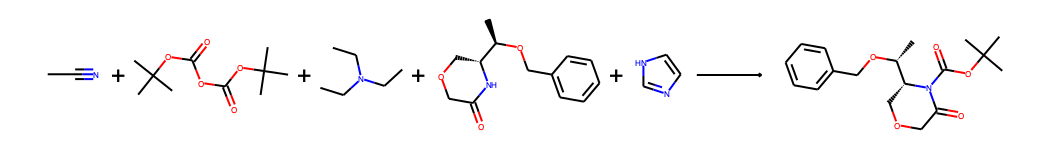

CC#N.CC(C)(C)OC(=O)OC(=O)OC(C)(C)C.CCN(CC)CC.C[C@@H](OCc1ccccc1)[C@H]1COCC(=O)N1.c1c[nH]cn1>>C[C@@H](OCc1ccccc1)[C@H]1COCC(=O)N1C(=O)OC(C)(C)C
NN-3 - 5.1.1 N-Boc protection



------------------------------------------------------------------------------------------------
Query: Reaction class - 3.1.5 Bromo Suzuki-type coupling


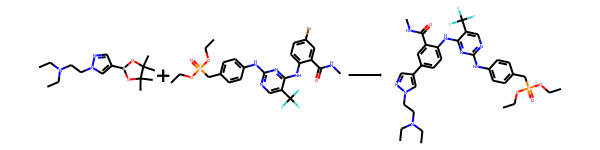

CCN(CC)CCn1cc(B2OC(C)(C)C(C)(C)O2)cn1.CCOP(=O)(Cc1ccc(Nc2ncc(C(F)(F)F)c(Nc3ccc(Br)cc3C(=O)NC)n2)cc1)OCC>>CCOP(=O)(Cc1ccc(Nc2ncc(C(F)(F)F)c(Nc3ccc(-c4cnn(CCN(CC)CC)c4)cc3C(=O)NC)n2)cc1)OCC
------------------------------------------------------------------------------------------------



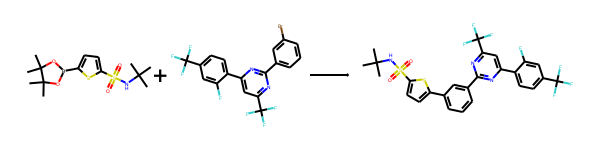

CC(C)(C)NS(=O)(=O)c1ccc(B2OC(C)(C)C(C)(C)O2)s1.Fc1cc(C(F)(F)F)ccc1-c1cc(C(F)(F)F)nc(-c2cccc(Br)c2)n1>>CC(C)(C)NS(=O)(=O)c1ccc(-c2cccc(-c3nc(-c4ccc(C(F)(F)F)cc4F)cc(C(F)(F)F)n3)c2)s1
NN-1 - 3.1.5 Bromo Suzuki-type coupling


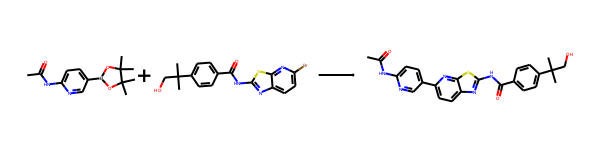

CC(=O)Nc1ccc(B2OC(C)(C)C(C)(C)O2)cn1.CC(C)(CO)c1ccc(C(=O)Nc2nc3ccc(Br)nc3s2)cc1>>CC(=O)Nc1ccc(-c2ccc3nc(NC(=O)c4ccc(C(C)(C)CO)cc4)sc3n2)cn1
NN-2 - 3.1.5 Bromo Suzuki-type coupling


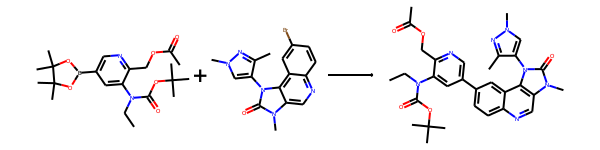

CCN(C(=O)OC(C)(C)C)c1cc(B2OC(C)(C)C(C)(C)O2)cnc1COC(C)=O.Cc1nn(C)cc1-n1c(=O)n(C)c2cnc3ccc(Br)cc3c21>>CCN(C(=O)OC(C)(C)C)c1cc(-c2ccc3ncc4c(c3c2)n(-c2cn(C)nc2C)c(=O)n4C)cnc1COC(C)=O
NN-3 - 3.1.5 Bromo Suzuki-type coupling



------------------------------------------------------------------------------------------------
Query: Reaction class - 10.2.1 Nitration


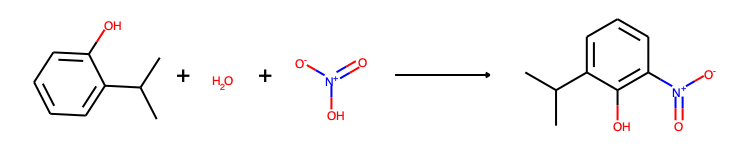

CC(C)c1ccccc1O.O.O=[N+]([O-])O>>CC(C)c1cccc([N+](=O)[O-])c1O
------------------------------------------------------------------------------------------------



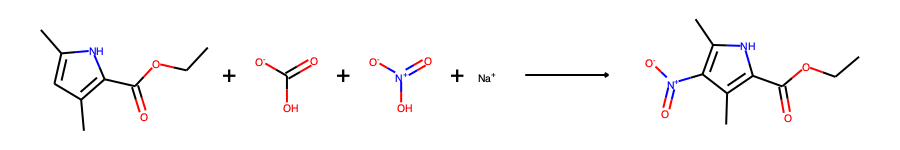

CCOC(=O)c1[nH]c(C)cc1C.O=C([O-])O.O=[N+]([O-])O.[Na+]>>CCOC(=O)c1[nH]c(C)c([N+](=O)[O-])c1C
NN-1 - 10.2.1 Nitration


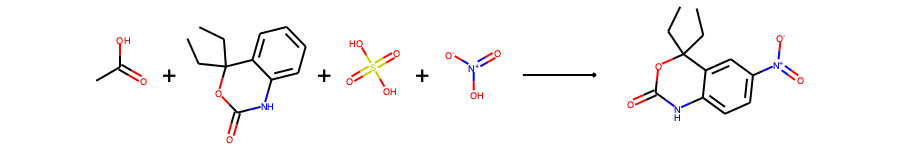

CC(=O)O.CCC1(CC)OC(=O)Nc2ccccc21.O=S(=O)(O)O.O=[N+]([O-])O>>CCC1(CC)OC(=O)Nc2ccc([N+](=O)[O-])cc21
NN-2 - 10.2.1 Nitration


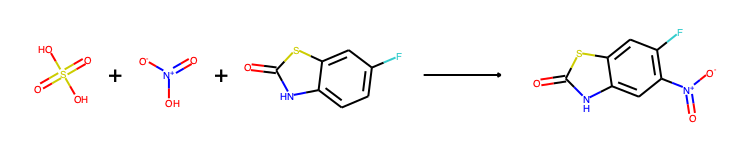

O=S(=O)(O)O.O=[N+]([O-])O.O=c1[nH]c2ccc(F)cc2s1>>O=c1[nH]c2cc([N+](=O)[O-])c(F)cc2s1
NN-3 - 10.2.1 Nitration



------------------------------------------------------------------------------------------------
Query: Reaction class - 6.1.1 N-Boc deprotection


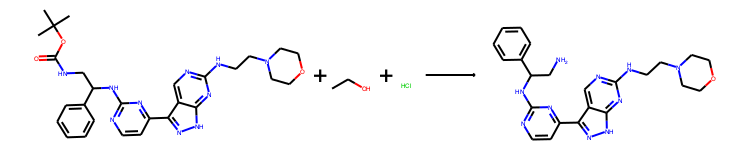

CC(C)(C)OC(=O)NCC(Nc1nccc(-c2n[nH]c3nc(NCCN4CCOCC4)ncc23)n1)c1ccccc1.CCO.Cl>>NCC(Nc1nccc(-c2n[nH]c3nc(NCCN4CCOCC4)ncc23)n1)c1ccccc1
------------------------------------------------------------------------------------------------



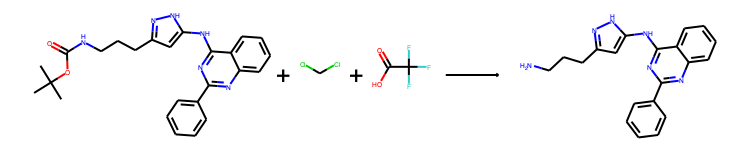

CC(C)(C)OC(=O)NCCCc1cc(Nc2nc(-c3ccccc3)nc3ccccc23)[nH]n1.ClCCl.O=C(O)C(F)(F)F>>NCCCc1cc(Nc2nc(-c3ccccc3)nc3ccccc23)[nH]n1
NN-1 - 6.1.1 N-Boc deprotection


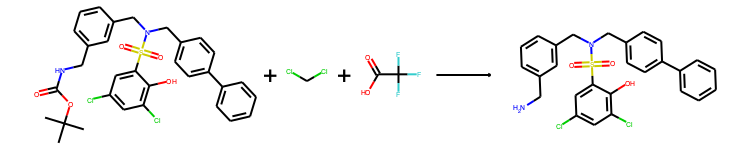

CC(C)(C)OC(=O)NCc1cccc(CN(Cc2ccc(-c3ccccc3)cc2)S(=O)(=O)c2cc(Cl)cc(Cl)c2O)c1.ClCCl.O=C(O)C(F)(F)F>>NCc1cccc(CN(Cc2ccc(-c3ccccc3)cc2)S(=O)(=O)c2cc(Cl)cc(Cl)c2O)c1
NN-2 - 6.1.1 N-Boc deprotection


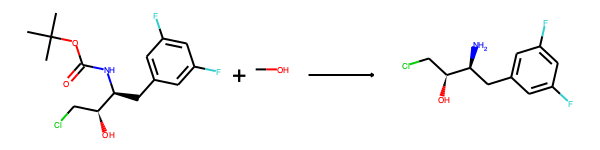

CC(C)(C)OC(=O)N[C@@H](Cc1cc(F)cc(F)c1)[C@H](O)CCl.CO>>N[C@@H](Cc1cc(F)cc(F)c1)[C@H](O)CCl
NN-3 - 6.1.1 N-Boc deprotection



------------------------------------------------------------------------------------------------
Query: Reaction class - 3.3.1 Sonogashira coupling


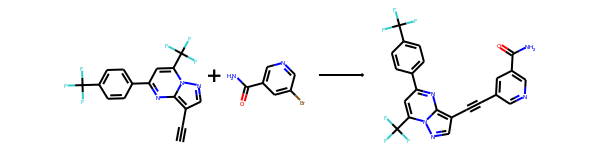

C#Cc1cnn2c(C(F)(F)F)cc(-c3ccc(C(F)(F)F)cc3)nc12.NC(=O)c1cncc(Br)c1>>NC(=O)c1cncc(C#Cc2cnn3c(C(F)(F)F)cc(-c4ccc(C(F)(F)F)cc4)nc23)c1
------------------------------------------------------------------------------------------------



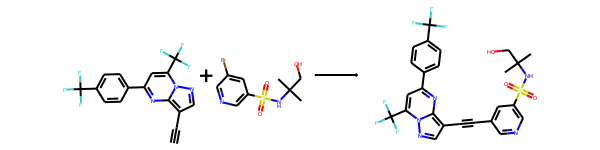

C#Cc1cnn2c(C(F)(F)F)cc(-c3ccc(C(F)(F)F)cc3)nc12.CC(C)(CO)NS(=O)(=O)c1cncc(Br)c1>>CC(C)(CO)NS(=O)(=O)c1cncc(C#Cc2cnn3c(C(F)(F)F)cc(-c4ccc(C(F)(F)F)cc4)nc23)c1
NN-1 - 3.3.1 Sonogashira coupling


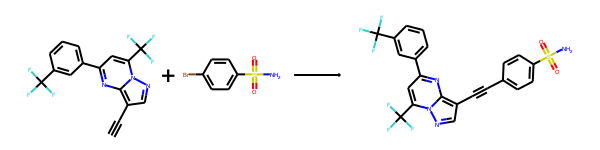

C#Cc1cnn2c(C(F)(F)F)cc(-c3cccc(C(F)(F)F)c3)nc12.NS(=O)(=O)c1ccc(Br)cc1>>NS(=O)(=O)c1ccc(C#Cc2cnn3c(C(F)(F)F)cc(-c4cccc(C(F)(F)F)c4)nc23)cc1
NN-2 - 3.3.1 Sonogashira coupling


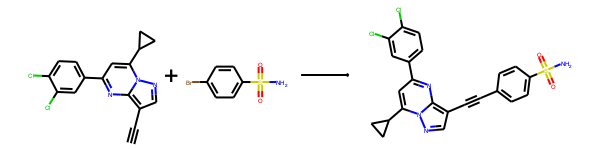

C#Cc1cnn2c(C3CC3)cc(-c3ccc(Cl)c(Cl)c3)nc12.NS(=O)(=O)c1ccc(Br)cc1>>NS(=O)(=O)c1ccc(C#Cc2cnn3c(C4CC4)cc(-c4ccc(Cl)c(Cl)c4)nc23)cc1
NN-3 - 3.3.1 Sonogashira coupling



------------------------------------------------------------------------------------------------
Query: Reaction class - 10.1.2 Chlorination


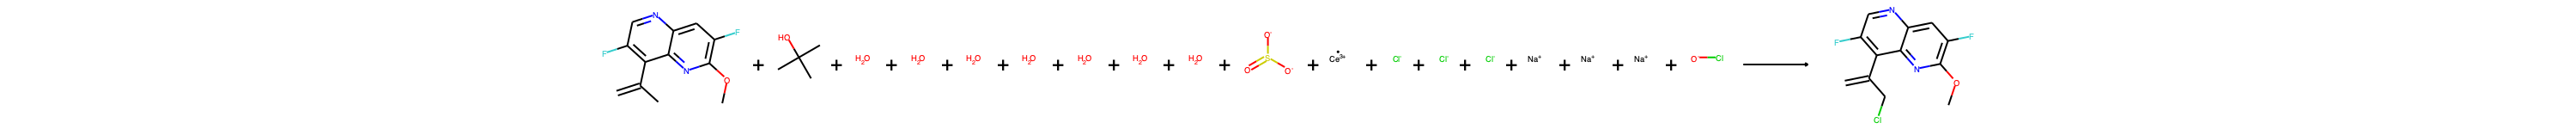

C=C(C)c1c(F)cnc2cc(F)c(OC)nc12.CC(C)(C)O.O.O.O.O.O.O.O.O=S([O-])[O-].[Ce+3].[Cl-].[Cl-].[Cl-].[Na+].[Na+].[Na+].[O-]Cl>>C=C(CCl)c1c(F)cnc2cc(F)c(OC)nc12
------------------------------------------------------------------------------------------------



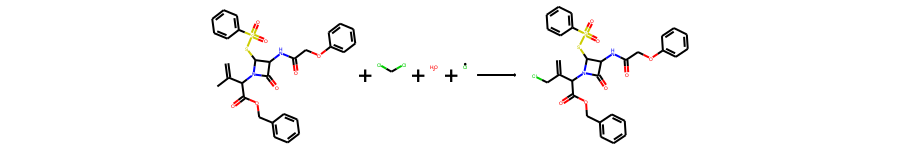

C=C(C)C(C(=O)OCc1ccccc1)N1C(=O)C(NC(=O)COc2ccccc2)C1SS(=O)(=O)c1ccccc1.ClCCl.O.[Cl]>>C=C(CCl)C(C(=O)OCc1ccccc1)N1C(=O)C(NC(=O)COc2ccccc2)C1SS(=O)(=O)c1ccccc1
NN-1 - 10.1.2 Chlorination


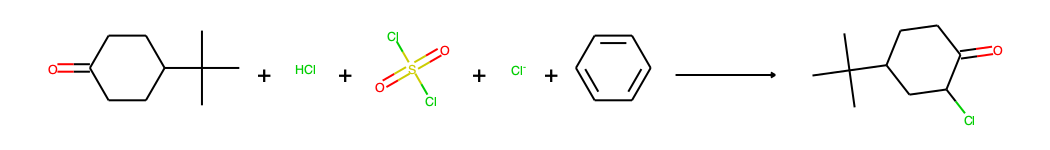

CC(C)(C)C1CCC(=O)CC1.Cl.O=S(=O)(Cl)Cl.[Cl-].c1ccccc1>>CC(C)(C)C1CCC(=O)C(Cl)C1
NN-2 - 10.1.2 Chlorination


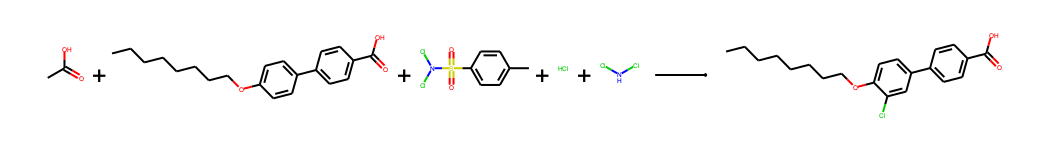

CC(=O)O.CCCCCCCCOc1ccc(-c2ccc(C(=O)O)cc2)cc1.Cc1ccc(S(=O)(=O)N(Cl)Cl)cc1.Cl.ClNCl>>CCCCCCCCOc1ccc(-c2ccc(C(=O)O)cc2)cc1Cl
NN-3 - 10.1.2 Chlorination



------------------------------------------------------------------------------------------------
Query: Reaction class - 1.6.4 Chloro N-alkylation


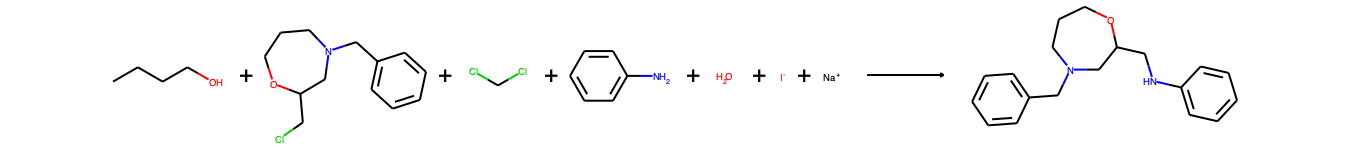

CCCCO.ClCC1CN(Cc2ccccc2)CCCO1.ClCCl.Nc1ccccc1.O.[I-].[Na+]>>c1ccc(CN2CCCOC(CNc3ccccc3)C2)cc1
------------------------------------------------------------------------------------------------



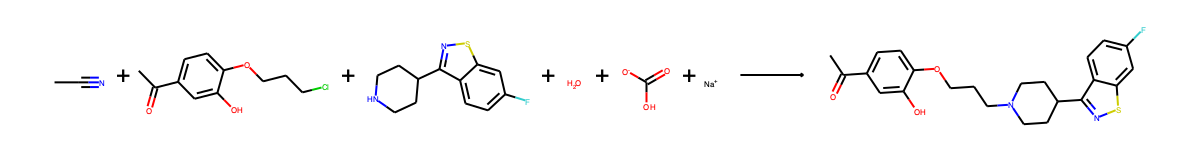

CC#N.CC(=O)c1ccc(OCCCCl)c(O)c1.Fc1ccc2c(C3CCNCC3)nsc2c1.O.O=C([O-])O.[Na+]>>CC(=O)c1ccc(OCCCN2CCC(c3nsc4cc(F)ccc34)CC2)c(O)c1
NN-1 - 1.6.4 Chloro N-alkylation


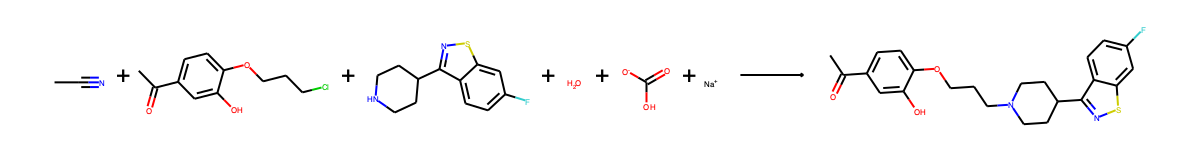

CC#N.CC(=O)c1ccc(OCCCCl)c(O)c1.Fc1ccc2c(C3CCNCC3)nsc2c1.O.O=C([O-])O.[Na+]>>CC(=O)c1ccc(OCCCN2CCC(c3nsc4cc(F)ccc34)CC2)c(O)c1
NN-2 - 1.6.4 Chloro N-alkylation


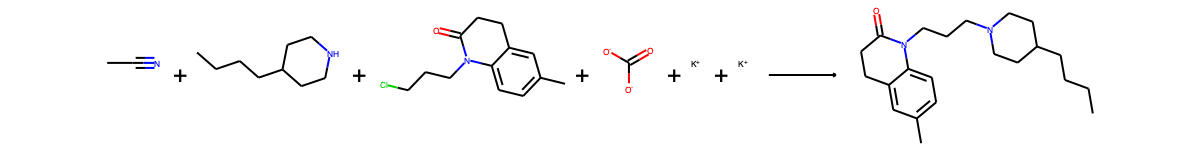

CC#N.CCCCC1CCNCC1.Cc1ccc2c(c1)CCC(=O)N2CCCCl.O=C([O-])[O-].[K+].[K+]>>CCCCC1CCN(CCCN2C(=O)CCc3cc(C)ccc32)CC1
NN-3 - 1.6.4 Chloro N-alkylation



------------------------------------------------------------------------------------------------
Query: Reaction class - 1.6.8 Iodo N-alkylation


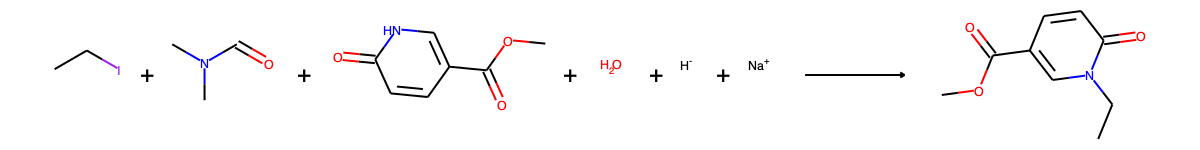

CCI.CN(C)C=O.COC(=O)c1ccc(=O)[nH]c1.O.[H-].[Na+]>>CCn1cc(C(=O)OC)ccc1=O
------------------------------------------------------------------------------------------------



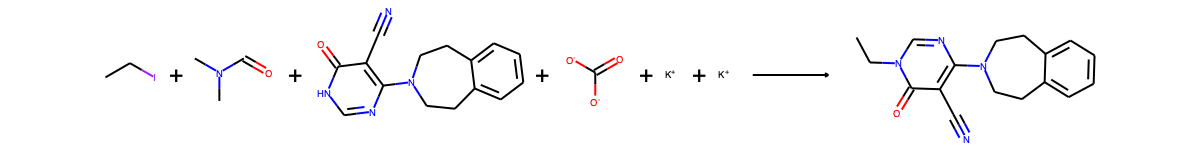

CCI.CN(C)C=O.N#Cc1c(N2CCc3ccccc3CC2)nc[nH]c1=O.O=C([O-])[O-].[K+].[K+]>>CCn1cnc(N2CCc3ccccc3CC2)c(C#N)c1=O
NN-1 - 1.6.8 Iodo N-alkylation


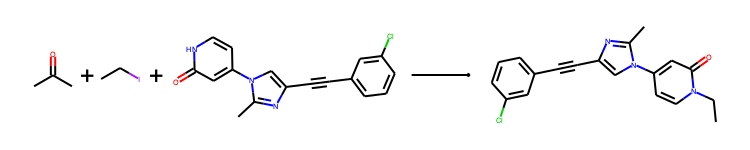

CC(C)=O.CCI.Cc1nc(C#Cc2cccc(Cl)c2)cn1-c1cc[nH]c(=O)c1>>CCn1ccc(-n2cc(C#Cc3cccc(Cl)c3)nc2C)cc1=O
NN-2 - 1.6.8 Iodo N-alkylation


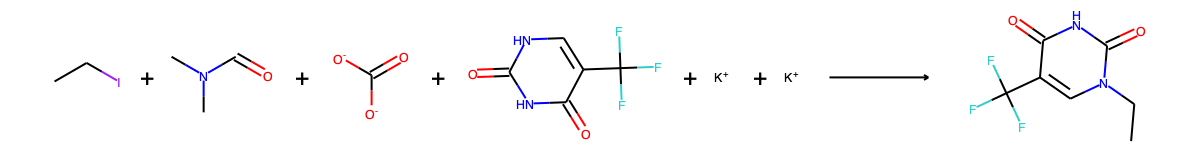

CCI.CN(C)C=O.O=C([O-])[O-].O=c1[nH]cc(C(F)(F)F)c(=O)[nH]1.[K+].[K+]>>CCn1cc(C(F)(F)F)c(=O)[nH]c1=O
NN-3 - 1.6.8 Iodo N-alkylation



------------------------------------------------------------------------------------------------
Query: Reaction class - 2.7.2 Sulfonic ester Schotten-Baumann


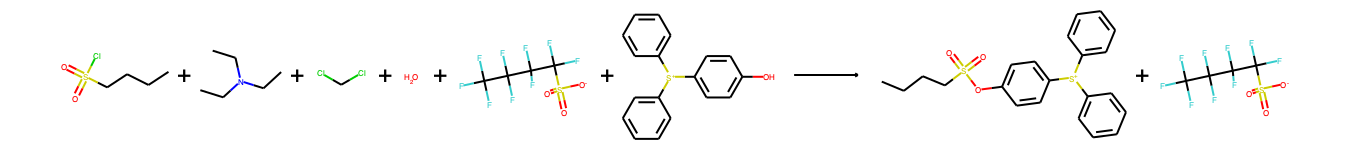

CCCCS(=O)(=O)Cl.CCN(CC)CC.ClCCl.O.O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)F.Oc1ccc([S+](c2ccccc2)c2ccccc2)cc1>>CCCCS(=O)(=O)Oc1ccc([S+](c2ccccc2)c2ccccc2)cc1.O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
------------------------------------------------------------------------------------------------



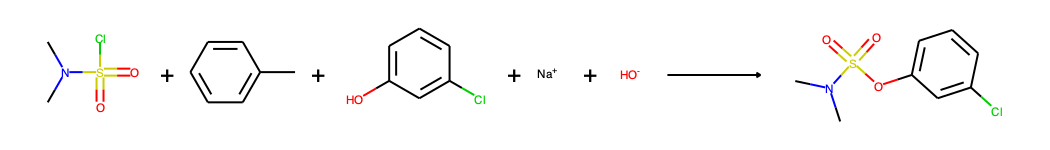

CN(C)S(=O)(=O)Cl.Cc1ccccc1.Oc1cccc(Cl)c1.[Na+].[OH-]>>CN(C)S(=O)(=O)Oc1cccc(Cl)c1
NN-1 - 2.7.2 Sulfonic ester Schotten-Baumann


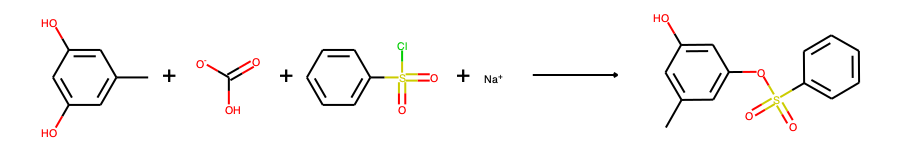

Cc1cc(O)cc(O)c1.O=C([O-])O.O=S(=O)(Cl)c1ccccc1.[Na+]>>Cc1cc(O)cc(OS(=O)(=O)c2ccccc2)c1
NN-2 - 2.7.2 Sulfonic ester Schotten-Baumann


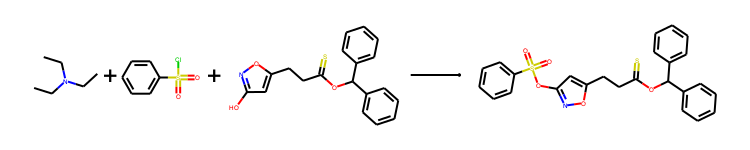

CCN(CC)CC.O=S(=O)(Cl)c1ccccc1.Oc1cc(CCC(=S)OC(c2ccccc2)c2ccccc2)on1>>O=S(=O)(Oc1cc(CCC(=S)OC(c2ccccc2)c2ccccc2)on1)c1ccccc1
NN-3 - 2.7.2 Sulfonic ester Schotten-Baumann



------------------------------------------------------------------------------------------------
Query: Reaction class - 1.7.4 Hydroxy to methoxy


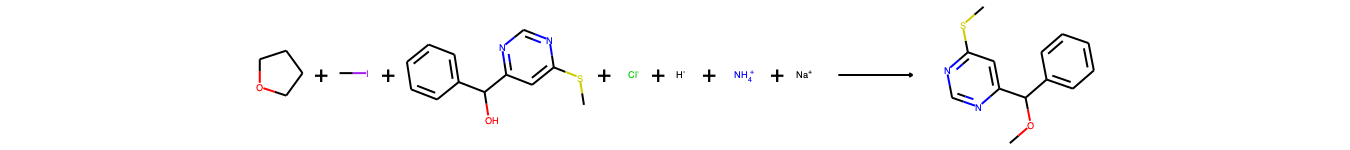

C1CCOC1.CI.CSc1cc(C(O)c2ccccc2)ncn1.[Cl-].[H-].[NH4+].[Na+]>>COC(c1ccccc1)c1cc(SC)ncn1
------------------------------------------------------------------------------------------------



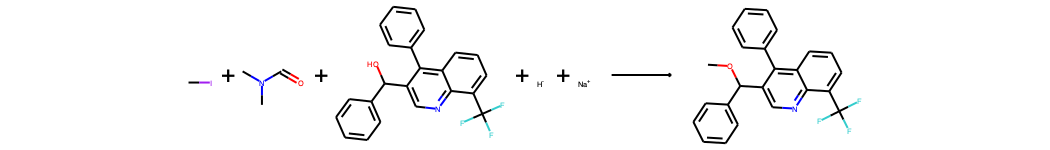

CI.CN(C)C=O.OC(c1ccccc1)c1cnc2c(C(F)(F)F)cccc2c1-c1ccccc1.[H-].[Na+]>>COC(c1ccccc1)c1cnc2c(C(F)(F)F)cccc2c1-c1ccccc1
NN-1 - 1.7.4 Hydroxy to methoxy


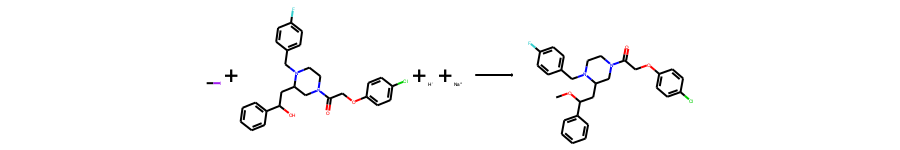

CI.O=C(COc1ccc(Cl)cc1)N1CCN(Cc2ccc(F)cc2)C(CC(O)c2ccccc2)C1.[H-].[Na+]>>COC(CC1CN(C(=O)COc2ccc(Cl)cc2)CCN1Cc1ccc(F)cc1)c1ccccc1
NN-2 - 1.7.4 Hydroxy to methoxy


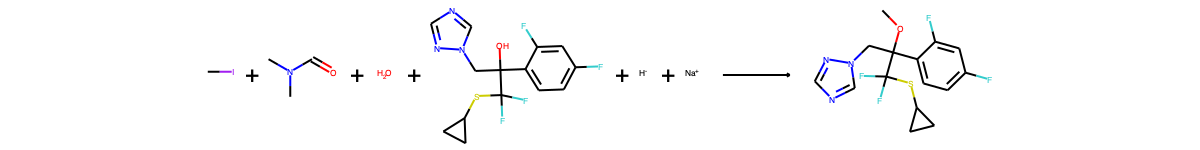

CI.CN(C)C=O.O.OC(Cn1cncn1)(c1ccc(F)cc1F)C(F)(F)SC1CC1.[H-].[Na+]>>COC(Cn1cncn1)(c1ccc(F)cc1F)C(F)(F)SC1CC1
NN-3 - 1.7.4 Hydroxy to methoxy





In [ ]:
# data
for i, row in schneider_df[schneider_df.split=='test'].sample(n=10, random_state=42).iterrows():
    print('------------------------------------------------------------------------------------------------')
    print('Query: Reaction class - {} {}'.format(row['rxn_class'], rxnclass2name[row['rxn_class']]))
    display(AllChem.ReactionFromSmarts(row['rxn'], useSmiles=True))
    print(row['rxn'])
    print('------------------------------------------------------------------------------------------------')
    print()
    
    nns = lf.query_linear_scan(row['mhfp'], 3, kc=200)
    for n, (_, j) in enumerate(nns):
        rxn = train_df.iloc[j]['rxn']
        display(AllChem.ReactionFromSmarts(rxn, useSmiles=True))
        print(rxn)
              
        print('NN-{} - {} {}'.format(n+1, train_df.iloc[j]['rxn_class'], rxnclass2name[train_df.iloc[j]['rxn_class']]))
        
    print()
    print()
    print()